In [1]:
import matplotlib.pyplot as plt
from collections import deque
import heapq

In [2]:
# Define the maze as a 2D list
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# Define the start and goal positions
start = (0, 0)
goal = (4, 4)

In [18]:
def get_neighbors(maze, position):
    #Return the neighbors of a position in the maze.
    neighbors = []
    row, col = position
    if row > 0 and maze[row-1][col] == 0:
        neighbors.append((row-1, col))
    if row < len(maze) - 1 and maze[row+1][col] == 0:
        neighbors.append((row+1, col))
    if col > 0 and maze[row][col-1] == 0:
        neighbors.append((row, col-1))
    if col < len(maze[0]) - 1 and maze[row][col+1] == 0:
        neighbors.append((row, col+1))
    return neighbors

def plot_maze(maze, path=None, title="Maze"):
    #Visualize the maze and the path found.
    plt.imshow(maze, cmap='binary')
    if path:
        for position in path:
            plt.plot(position[1], position[0], 'ro')  # 'ro' for red circles
    plt.title(title)
    plt.show()

In [13]:
def dfs(maze, start, goal):
    #Perform Depth-First Search (DFS) to find a path in the maze.
    stack = [(start, [start])]
    visited = set()

    while stack:
        (current, path) = stack.pop()
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return path
        for neighbor in get_neighbors(maze, current):
            stack.append((neighbor, path + [neighbor]))
    return None

In [14]:
def bfs(maze, start, goal):
    #Perform Breadth-First Search (BFS) to find a path in the maze.
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        (current, path) = queue.popleft()
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return path
        for neighbor in get_neighbors(maze, current):
            queue.append((neighbor, path + [neighbor]))
    return None

In [15]:
def heuristic(a, b):
    #Heuristic function for A* (Manhattan distance).
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    #Perform A* Search to find a path in the maze.
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        current = heapq.heappop(open_list)[1]
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(maze, current):
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))
    return None

Path found using DFS: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Path found using BFS: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
Path found using A*: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


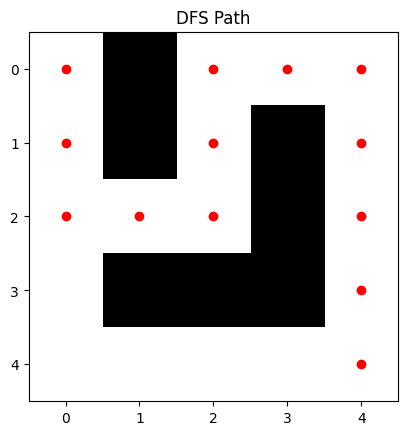

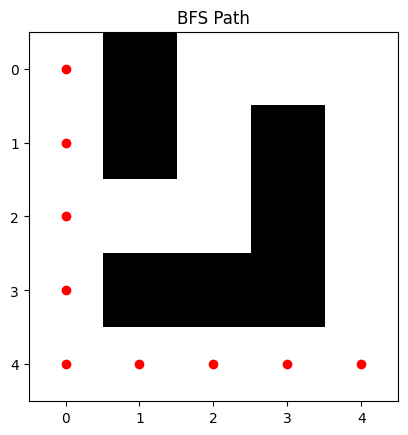

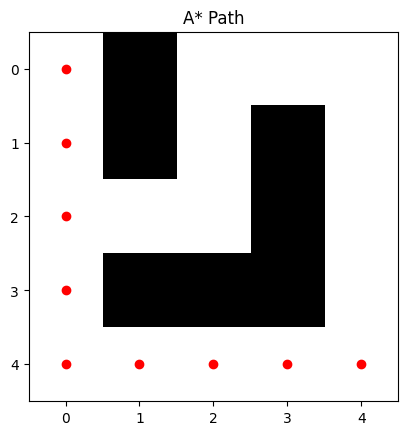

In [16]:
# Find paths using different search algorithms
dfs_path = dfs(maze, start, goal)
bfs_path = bfs(maze, start, goal)
a_star_path = a_star(maze, start, goal)

# Print the results
if dfs_path:
    print("Path found using DFS:", dfs_path)
else:
    print("No path found using DFS")

if bfs_path:
    print("Path found using BFS:", bfs_path)
else:
    print("No path found using BFS")

if a_star_path:
    print("Path found using A*:", a_star_path)
else:
    print("No path found using A*")

# Visualize the results
plot_maze(maze, dfs_path, title="DFS Path")
plot_maze(maze, bfs_path, title="BFS Path")
plot_maze(maze, a_star_path, title="A* Path")